<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Motion of a Comet. Optimized Algorithm

### About this notebook

In this notebook we solve the equations of motion for a comet around the Sun.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## A Comet-Sun System

In this application problem, we will describe the motion of a comet orbiting around the Sun. We will consider that the comet has a mass $m$ very small compared to Sun's mass $M$, i.e. $m \ll M$. This assumption implies that Sun will remain static as the comet orbits under the influence of its gravity. 

For example, the mass of Halley's comet is $m \approx 2.2 \times 10^{14}$ kg which is a very small quantity compared with Sun's mass $M \approx 1.9 \times 10^{30}$ kg.

---
The equations of motion of the comet, in cartesian coordinates with origin on the Sun's center, are

\begin{align}
\frac{d^2 x}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{d^2 y}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y ,
\end{align}

where we restricted the problem to the $xy$-plane. In order to solve this ODEs system, we will transform it into a first-order differential system by introducing two new functions,

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y
\end{align}


An important consideration to take into account involves the big numbers involved in the problem such as the Sun's mass and the distances, which will be of the order of $1$ au. Hence, it is convenient to use a system of units with

- unit of mass: Solar mass
- units of distance: au
- units of time: years

Hence, the Newtonian gravitational constant will have the value $G = 4\pi^2$,

In [1]:
path=''

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/AC/Colab Notebooks/08. Motion of a Comet/'

import sys 
sys.path.append(path) # Append the path of the local modules

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We implement the ODEs system defining the function `f` and we also include a function that calculates the conserved quantities of the problem (Total energy and angular momentum).

In [4]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    '''
    f = np.zeros(4)
    f[0] = q0[2]
    f[1] = q0[3]
    f[2] = - G*M*q0[0]/(q0[0]**2 + q0[1]**2)**(3/2)
    f[3] = - G*M*q0[1]/(q0[0]**2 + q0[1]**2)**(3/2)
    return f

def conserv_quant(q):
  '''
  ------------------------------------------
  conserv_quant(q)
  ------------------------------------------
  Evaluates the total energy and the total 
  angular momentum for the system 
  ------------------------------------------
  Arguments:
  q: NumPy array with the state of the 
     system in the format
     q = [x, y, vx, vy]
  ------------------------------------------
  Returns:
  E : Total Energy
  L : Total Angular Momentum
  ------------------------------------------
  '''
  v2 = q[2]**2 + q[3]**2
  r = np.sqrt(q[0]**2 + q[1]**2)
  E = v2/2 - G*M/r
  L = q[0]*q[3] - q[1]*q[2]
  return E, L


In order to obtain a bound orbit in the problem of motion of the comet around the Sun, we may impose the particular initial condition
\begin{equation}
    \begin{cases}
    x_0 = & 1\text{ au}\\
    y_0 = & 0 \\
    v^x = & 0 \\
    v^y = & 3\frac{\text{au}}{\text{yr}}.
    \end{cases}
\end{equation}

The time grid to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years. 

## Soving the ODEs System

Using the RK4 algorithms to solve the differential problem, we obtain

In [5]:
# Runge-Kutta 4 Algorithm
from RK4 import *
# Computation time
import time

# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 500000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
Q = np.zeros([n,4]) # State of the system information
Energy = np.zeros(n) # Total Energy of the system
AngMom = np.zeros(n) # Total Angular Momentum of the system

# Initial Conditions
Q[0,0] = 1.
Q[0,1] = 0.
Q[0,2] = 0.
Q[0,3] = 3.
Energy[0], AngMom[0] = conserv_quant(Q[0])

start = time.time()
# Main loops for solving the problem
for i in range(1,n):
    Q[i] = RK4(f, h, 0, Q[i-1])
    Energy[i], AngMom[i] = conserv_quant(Q[i])

end = time.time()
print('The elapsed time was:', end - start)

The elapsed time was: 40.24833130836487


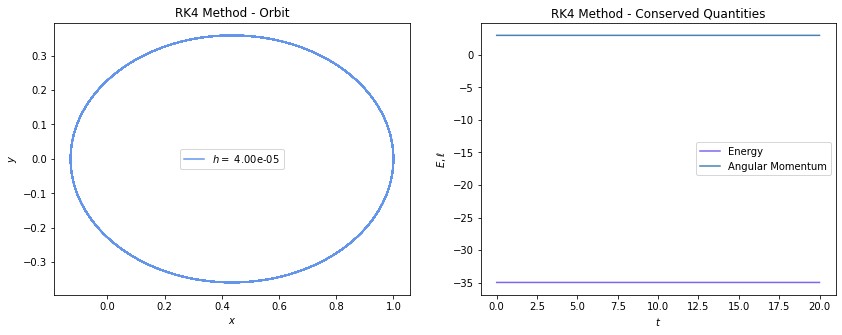

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0].set_title('RK4 Method - Orbit')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax[1].plot(t, AngMom, color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

These plots show clearly that the forward Euler's method with a not-so-small setpsize does not satisfies the conservation of energy (and produces a small increase in the angular momentum), while the RK4 do have a very good behavior.

In [7]:
print('The change in energy is :', np.abs(Energy[n-1] - Energy[0]))
print('\nThe change in angular momentum is :', np.abs(AngMom[n-1] - AngMom[0]))

The change in energy is : 3.5829259559250204e-09

The change in angular momentum is : 1.6327383889347402e-11


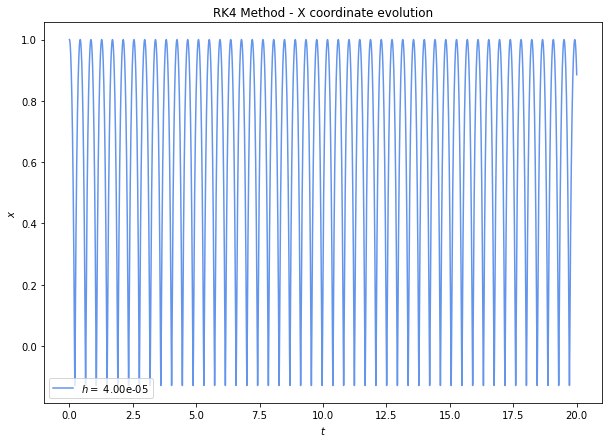

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(t, Q[:,0], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax.set_title('RK4 Method - X coordinate evolution')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend()

plt.show()

In [9]:
# Save data of the orbit
np.savetxt(path+'comet_orbit.txt', Q, header='x y vx vy')